__Students:__ Andrea Ceriati, Kathryn Lesh, Emily Sims, Scott Zuckerbrow

__Instructor:__ Daniel Pulido-Mendez

__Course:__ Data Analytics Boot Camp

__Assignment:__ Project 4

__Date:__ 04/22/2024

## Table of Contents

[**Importing Libraries**](#IL)

1. [**Data Cleaning & Wrangling**](#DWrang)

    1.1 [**Checking and Correcting Data Format**](#Dform)

    1.2 [**Handling Missing Data**](#MissD)

2. [**Exploratory Data Analysis**](#EDA)

    2.1 [**Descriptive Statistics**](#DS)

    2.2 [**Correlation**](#Corr)

3. [**Model Development**](#MDev)

4. [**Conclusions**](#Concl)

## Importing Libraries <a name="IL"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## 1. Data Cleaning & Wrangling <a name="DWrang"></a>

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

#  Import and read the "Shark Tank US dataset.csv".
sharktank_df = pd.read_csv("Shark Tank US dataset.csv")
sharktank_df.head()

Season Number              Startup Name  Episode Number  Pitch Number  \
0              1            AvaTheElephant               1             1   
1              1        Mr.Tod'sPieFactory               1             2   
2              1                   Wispots               1             3   
3              1  CollegeFoxesPackingBoxes               1             4   
4              1                  IonicEar               1             5   

  Season Start Season End Original Air Date           Industry  \
0     9-Aug-09   5-Feb-10          9-Aug-09    Health/Wellness   
1     9-Aug-09   5-Feb-10          9-Aug-09  Food and Beverage   
2     9-Aug-09   5-Feb-10          9-Aug-09  Business Services   
3     9-Aug-09   5-Feb-10          9-Aug-09     Lifestyle/Home   
4     9-Aug-09   5-Feb-10          9-Aug-09      Software/Tech   

                              Business Description  \
0           Ava The Elephant - Baby and Child Care   
1           Mr. Tod's Pie Factory - Specialty Food   
2                      Wispots - Consumer Services   
3  College Foxes Packing Boxes - Consumer Services   
4                            Ionic Ear - Novelties   

                       Company Website Pitchers Gender Pitchers City  \
0       http://www.avatheelephant.com/          Female       Atlanta   
1                  http://whybake.com/            Male      Somerset   
2              http://www.wispots.com/            Male          Cary   
3  http://collegehunkshaulingjunk.com/            Male         Tampa   
4                                  NaN            Male      St. Paul   

  Pitchers State Pitchers Average Age           Entrepreneur Names  \
0             GA                  NaN              Tiffany Krumins   
1             NJ                  NaN                   Tod Wilson   
2             NC                  NaN               Kevin Flannery   
3             FL                  NaN  Nick Friedman, Omar Soliman   
4             MN                  NaN               Darrin Johnson   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15                50000   
1                     0.0           4.15               460000   
2                     0.0           4.15              1200000   
3                     0.0           4.15               250000   
4                     0.0           4.15              1000000   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                NaN   
3                     25.0              1000000         0                NaN   
4                     15.0              6666667         0                NaN   

   Total Deal Equity  Deal Valuation  Number of Sharks in Deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  \
0                      50000.0              55.0           NaN   
1                     230000.0              25.0           NaN   
2                          NaN               NaN           NaN   
3                          NaN               NaN           NaN   
4                          NaN               NaN           NaN   

   Advisory Shares Equity  Loan Deal Has Conditions  \
0                     NaN   NaN                 NaN   
1                     NaN   NaN                 NaN   
2                     NaN   NaN                 NaN   
3                     NaN   NaN                 NaN   
4                     NaN   N

In [3]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns."\
      .format(sharktank_df.shape[0], sharktank_df.shape[1]))

The sharktank_df dataframe has 1345 rows and 53 columns.


1.1 Checking and correcting data format

In [5]:
# Determine columns datatype
sharktank_df.dtypes

Season Number                           int64
Startup Name                           object
Episode Number                          int64
Pitch Number                            int64
Season Start                           object
Season End                             object
Original Air Date                      object
Industry                               object
Business Description                   object
Company Website                        object
Pitchers Gender                        object
Pitchers City                          object
Pitchers State                         object
Pitchers Average Age                   object
Entrepreneur Names                     object
Multiple Entrepreneurs                float64
US Viewership                         float64
Original Ask Amount                     int64
Original Offered Equity               float64
Valuation Requested                     int64
Got Deal                                int64
Total Deal Amount                 

In [6]:
# Convert "Season Start", "Season End", "Original Air Date" columns to datetime
# Specify the format of the dates
date_format = '%d-%b-%y'
sharktank_df['Season Start'] = pd.to_datetime(sharktank_df['Season Start'], format=date_format)
sharktank_df['Season End'] = pd.to_datetime(sharktank_df['Season End'], format=date_format)
sharktank_df['Original Air Date'] = pd.to_datetime(sharktank_df['Original Air Date'], format=date_format)

1.2 Handling Missing Data

In [7]:
# Determine the number of missing values in each column
missing_data = sharktank_df.isnull()
for column in missing_data.columns:
    print(column)
    for value, count in missing_data[column].value_counts().items():
        print(f"{value}: {count}")
    print("")

Season Number
False: 1345

Startup Name
False: 1345

Episode Number
False: 1345

Pitch Number
False: 1345

Season Start
False: 1345

Season End
False: 1274
True: 71

Original Air Date
False: 1345

Industry
False: 1345

Business Description
False: 1345

Company Website
True: 758
False: 587

Pitchers Gender
False: 1338
True: 7

Pitchers City
True: 819
False: 526

Pitchers State
False: 789
True: 556

Pitchers Average Age
True: 936
False: 409

Entrepreneur Names
False: 850
True: 495

Multiple Entrepreneurs
False: 918
True: 427

US Viewership
False: 1341
True: 4

Original Ask Amount
False: 1345

Original Offered Equity
False: 1345

Valuation Requested
False: 1345

Got Deal
False: 1345

Total Deal Amount
False: 814
True: 531

Total Deal Equity
False: 814
True: 531

Deal Valuation
False: 814
True: 531

Number of Sharks in Deal
False: 814
True: 531

Investment Amount Per Shark
False: 814
True: 531

Equity Per Shark
False: 814
True: 531

Royalty Deal
True: 1265
False: 80

Advisory Shares Equity

In [8]:
# Determine the rows with missing values in "Season End", and also include "Season Number" and "Season Start" to gain further insights
dfN=sharktank_df[['Season Number', 'Season Start','Season End']] # defines a new dataframe
dfN[dfN.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

Season Number Season Start Season End
1274             15   2023-09-29        NaT
1275             15   2023-09-29        NaT
1276             15   2023-09-29        NaT
1277             15   2023-09-29        NaT
1278             15   2023-09-29        NaT
...             ...          ...        ...
1340             15   2023-09-29        NaT
1341             15   2023-09-29        NaT
1342             15   2023-09-29        NaT
1343             15   2023-09-29        NaT
1344             15   2023-09-29        NaT

[71 rows x 3 columns]

In [9]:
# Replace missing values in the "Season End" column with the actual date when the season is going to end
sharktank_df['Season End'].replace(np.nan, '5-3-2024', inplace=True)

NOTE: Should we leave the company website name with missing values?

In [11]:
# The company website has 587 missing values, replace data with binary data (0 has a website / 1 it does not have a website)
sharktank_df['Company Website'] = sharktank_df['Company Website'].notna().astype(int)

In [12]:
# Determine the rows with missing values in Pitchers Gender
dfN1=sharktank_df[['Pitchers Gender']] # defines a new dataframe
dfN1[dfN1.isnull().any(axis=1)] # checks which rows in the new dataframe contain missing values

Pitchers Gender
994              NaN
998              NaN
1000             NaN
1004             NaN
1070             NaN
1099             NaN
1121             NaN

In [13]:
# Determine the missing value gathering information from other columns such as Startup Name and Entrepreneur Names
sharktank_df.iloc[[994, 998, 1000, 1004, 1070, 1099, 1121]]

Season Number  Startup Name  Episode Number  Pitch Number Season Start  \
994              12         Rumpl               1           995   2020-10-16   
998              12   PNuffCrunch               2           999   2020-10-16   
1000             12  AnimatedLure               3          1001   2020-10-16   
1004             12  SurpriseCake               4          1005   2020-10-16   
1070             12     FurZapper              20          1071   2020-10-16   
1099             13      Sparketh               3          1100   2021-10-08   
1121             13    TheRealElf               8          1122   2021-10-08   

     Season End Original Air Date            Industry  \
994  2021-05-21        2020-10-16      Lifestyle/Home   
998  2021-05-21        2020-10-23   Food and Beverage   
1000 2021-05-21        2020-10-30      Lifestyle/Home   
1004 2021-05-21        2020-11-06   Food and Beverage   
1070 2021-05-21        2021-04-09        Pet Products   
1099 2022-05-20        2021-10-22  Children/Education   
1121 2022-05-20        2021-12-10      Lifestyle/Home   

                                 Business Description  Company Website  \
994                         high performance blankets                1   
998         non-gmo, plant-based, puffed peanut snack                1   
1000                        Rechargeable robotic lure                0   
1004                  Surprise gifts inside of a cake                1   
1070  product that helps remove pet hair from clothes                0   
1099          Online art education for kids and teens                0   
1121                        personal digital messages                0   

     Pitchers Gender Pitchers City Pitchers State Pitchers Average Age  \
994              NaN      Portland             OR                  NaN   
998              NaN           NaN            NaN                  NaN   
1000             NaN           NaN            NaN                  NaN   
1004             NaN           NaN            NaN                  NaN   
1070             NaN  Ocean County             NJ               Middle   
1099             NaN           NaN            NaN                  NaN   
1121             NaN           NaN            NaN                Young   

                   Entrepreneur Names  Multiple Entrepreneurs  US Viewership  \
994                    Wylie Robinson                     0.0           4.03   
998                      Juan Salinas                     0.0           3.90   
1000    Sobhan Kanaee and Kanz Kayfan                     1.0           4.42   
1004        Jordan Long and Liz Charm                     1.0           2.31   
1070  Harry Levin and Michael Sweigar                     1.0           4.31   
1099     Dwayne Walker and Tim Samuel                     1.0           3.55   
1121                       Tommy Holl                     0.0           3.57   

      Original Ask Amount  Original Offered Equity  Valuation Requested  \
994                600000                      4.0             15000000   
998                300000                     10.0              3000000   
1000               325000                     10.0              3250000   
1004               200000                      8.0              2500000   
1070               600000                     10.0              6000000   
1099               100000                      8.0              1250000   
1121               125000                     25.0               500000   

      Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
994          0                NaN                NaN             NaN   
998          1           400000.0               25.0       1600000.0   
1000         1           325000.0               10.0       3250000.0   
1004         0                NaN                NaN             NaN   
1070         1           600000.0               15.0       4000000.0   
1099         1           100000.0               

In [14]:
# Replace missing values in gender column after having conducted a brief research on the pitchers gender
sharktank_df.loc[994, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[998, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1000, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1004, 'Pitchers Gender'] = 'Mixed Team'
sharktank_df.loc[1070, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1099, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1121, 'Pitchers Gender'] = 'Male'

NOTE: Should we leave the columns 'Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names' with missing values?

In [15]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age due to more than one-third of the values being missing for each column
sharktank_df.drop(columns=['Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names'], inplace=True)

In [16]:
# Multiple Entrepreneurs column has a lot of missing values
# Replace values in column 'Multiple Entrepreneurs' where the corresponding value in column 'Pitchers Gender' is 'Mixed Team'.
sharktank_df.loc[sharktank_df['Pitchers Gender'] == 'Mixed Team', 'Multiple Entrepreneurs'] = 1

NOTE: 354 values missing in 'Multiple Entrepreneurs' column. Drop it?

In [17]:
# Drop Multiple Entrepreneurs due to more than one-quarter of the values being missing for each column
sharktank_df.drop(columns=['Multiple Entrepreneurs'], inplace=True)

In [18]:
# Determine the rows with missing values in "US Viewership"
dfN2=sharktank_df[['US Viewership']] # defines a new dataframe
dfN2[dfN2.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

US Viewership
1341            NaN
1342            NaN
1343            NaN
1344            NaN

In [19]:
# Viewership has missing values for last four episodes, check what was the viewership for the episodes before the last four.
sharktank_df.tail(10)

Season Number        Startup Name  Episode Number  Pitch Number  \
1335             15          FunkyMello              16          1335   
1336             15       DaVinciEyeApp              16          1336   
1337             15               Boona              17          1337   
1338             15   LetThemEatCandles              17          1338   
1339             15      ChefeeRobotics              17          1339   
1340             15           LadyAlpha              17          1340   
1341             15       NowhereBakery              18          1341   
1342             15  TheMurderMysteryCo              18          1342   
1343             15            Overplay              18          1343   
1344             15       Nourish+Bloom              18          1344   

     Season Start Season End Original Air Date           Industry  \
1335   2023-09-29 2024-03-05        2024-03-01  Food and Beverage   
1336   2023-09-29 2024-03-05        2024-03-01      Software/Tech   
1337   2023-09-29 2024-03-05        2024-03-08     Lifestyle/Home   
1338   2023-09-29 2024-03-05        2024-03-08     Lifestyle/Home   
1339   2023-09-29 2024-03-05        2024-03-08        Electronics   
1340   2023-09-29 2024-03-05        2024-03-08     Lifestyle/Home   
1341   2023-09-29 2024-03-05        2024-03-15  Food and Beverage   
1342   2023-09-29 2024-03-05        2024-03-15    Uncertain/Other   
1343   2023-09-29 2024-03-05        2024-03-15      Software/Tech   
1344   2023-09-29 2024-03-05        2024-03-15     Lifestyle/Home   

             Business Description  Company Website Pitchers Gender  \
1335            Marshmallow creme                1      Mixed Team   
1336              App for artists                1            Male   
1337            Tandem Showerhead                1            Male   
1338      Edible birthday candles                1      Mixed Team   
1339                 Robotic chef                1            Male   
1340                Nursing cover                1      Mixed Team   
1341               Healthy bakery                1      Mixed Team   
1342       Murder mystery parties                1            Male   
1343  App for video game creation                1      Mixed Team   
1344     Autonomous grocery store                1      Mixed Team   

      US Viewership  Original Ask Amount  Original Offered Equity  \
1335           3.13                50000                     15.0   
1336           3.13               350000                      5.0   
1337           3.13               400000                     10.0   
1338           3.13               250000                     10.0   
1339           3.13               500000                      4.0   
1340           3.13               100000                     10.0   
1341            NaN               200000                     10.0   
1342            NaN               350000                      5.0   
1343            NaN               500000                      2.5   
1344            NaN               400000                      5.0   

      Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
1335               333333         1            50000.0               15.0   
1336              7000000         0                NaN                NaN   
1337              4000000         0                NaN                NaN   
1338              2500000         1           250000.0               18.0   
1339             12500000         1           500000.0               15.0   
1340              1000000         1           100000.0               10.0   
1341              2000000         1           100000.0               12.5   
1342              7000000         1           350000.0               10.0   
1343             20000000         1           500000.0                4.0   
1344              8000000         0                NaN                NaN   

      Deal Valuation  Number of Sharks in Deal  Investment Amou

In [20]:
# Assume that the viewership will remain constant for the last four episodes, replace missing value with 3.13
sharktank_df['US Viewership'].replace(np.nan, 3.13, inplace=True)

In [21]:
# Replace the missing values for the columns below with 0
sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']] = \
    sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']].fillna(0)

NOTE: Drop Loan column? Has just 55 non null values. 'Advisory Shares Equity' and 'Deal Has Conditions' have just 1 value each.

In [22]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age due to more than one-third of the values being missing for each column
sharktank_df.drop(columns=['Advisory Shares Equity', 'Loan', 'Deal Has Conditions'], inplace=True)

In [23]:
def fill_present_columns(df, present_column, investment_column):
    # Replace missing values in 'present_column' with 1 where 'investment_column' is not missing
    df.loc[~df[investment_column].isna(), present_column] = 1

    # Identify rows where 'present_column' is 1
    guest_present_rows = df[df[present_column] == 1]

    # Replace missing values with 1 in the 'present_column' for the selected 'Season Number' and 'Episode Number'
    for index, row in guest_present_rows.iterrows():
        season_number = row['Season Number']
        episode_number = row['Episode Number']
        df.loc[(df['Season Number'] == season_number) & 
               (df['Episode Number'] == episode_number) &
               (df[present_column].isna()), present_column] = 1

In [24]:
# Call the function for Guests
fill_present_columns(sharktank_df, 'Guest Present', 'Guest Investment Amount')

In [25]:
# Assumption: if a guest did not make at least one deal in one episode he was not considered present in that episode
# Replace the missing values for the columns below with 0
sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']] = \
    sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']].fillna(0)

sharktank_df['Guest Name'].replace(np.nan, "NA", inplace=True)

In [27]:
# Assumption: if a investor did not make at least one deal in one episode he was not considered present that episodes (for episode in which we do not have data)
# Call the function defined above for Barbara Corcoran, Mark Cuban, Lori Greiner, Robert Herjavec, Daymond John, Kevin O Leary
fill_present_columns(sharktank_df, 'Barbara Corcoran Present', 'Barbara Corcoran Investment Amount')
fill_present_columns(sharktank_df, 'Mark Cuban Present', 'Mark Cuban Investment Amount')
fill_present_columns(sharktank_df, 'Lori Greiner Present', 'Lori Greiner Investment Amount')
fill_present_columns(sharktank_df, 'Robert Herjavec Present', 'Robert Herjavec Investment Amount')
fill_present_columns(sharktank_df, 'Daymond John Present', 'Daymond John Investment Amount')
fill_present_columns(sharktank_df, 'Kevin O Leary Present', 'Kevin O Leary Investment Amount')

In [28]:
# Replace the missing values for the columns below with 0
sharktank_df[['Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
              'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity',
              'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 
              'Daymond John Present', 'Kevin O Leary Present']] = \
    sharktank_df[['Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
                  'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity',
                  'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 
                  'Daymond John Present', 'Kevin O Leary Present']].fillna(0)

In [29]:
# Replace values in row 6 columns 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present' with 0 after confirming that MArc Cuban was not a shark in Shark Tank season 1 episode 2
sharktank_df.loc[6, ['Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present']] = 0

In [30]:
# Create new columns indicating whether each investor made a deal
sharktank_df['Barbara Corcoran Got Deal'] = (sharktank_df['Barbara Corcoran Investment Amount'] != 0).astype(int)
sharktank_df['Mark Cuban Got Deal'] = (sharktank_df['Mark Cuban Investment Amount'] != 0).astype(int)
sharktank_df['Lori Greiner Got Deal'] = (sharktank_df['Lori Greiner Investment Amount'] != 0).astype(int)
sharktank_df['Robert Herjavec Got Deal'] = (sharktank_df['Robert Herjavec Investment Amount'] != 0).astype(int)
sharktank_df['Daymond John Got Deal'] = (sharktank_df['Daymond John Investment Amount'] != 0).astype(int)
sharktank_df['Kevin O Leary Got Deal'] = (sharktank_df['Kevin O Leary Investment Amount'] != 0).astype(int)

In [31]:
# Determine the size of the dataframe
print("The campaign_df dataframe has {} rows and {} columns."\
      .format(sharktank_df.shape[0], sharktank_df.shape[1]))

The campaign_df dataframe has 1345 rows and 51 columns.


In [32]:
# Check for remaining missing values
print('The number of missing values in the dataset is:',sharktank_df.isnull().sum().sum())

The number of missing values in the dataset is: 0


In [33]:
#sharktank_df.to_csv('output.csv', index=False)

## 2. Exploratory Data Analysis <a name="EDA"></a>

### 2.1 Descriptive Statistics <a name="DS"></a>

In [34]:
sharktank_df.describe()

Season Number  Episode Number  Pitch Number  \
count    1345.000000     1345.000000   1345.000000   
mean        8.293680       12.361338    672.992565   
min         1.000000        1.000000      1.000000   
25%         5.000000        6.000000    337.000000   
50%         8.000000       12.000000    673.000000   
75%        12.000000       18.000000   1009.000000   
max        15.000000       29.000000   1344.000000   
std         3.955387        7.404269    388.399589   

                        Season Start                     Season End  \
count                           1345                           1345   
mean   2017-01-20 08:27:28.773234176  2017-08-17 10:25:14.944237824   
min              2009-08-09 00:00:00            2010-02-05 00:00:00   
25%              2013-09-20 00:00:00            2014-05-16 00:00:00   
50%              2016-09-23 00:00:00            2017-05-12 00:00:00   
75%              2020-10-16 00:00:00            2021-05-21 00:00:00   
max              2023-09-29 00:00:00            2024-03-05 00:00:00   
std                              NaN                            NaN   

                   Original Air Date  Company Website  US Viewership  \
count                           1345      1345.000000     1345.00000   
mean   2017-05-03 08:11:25.204461056         0.436431        5.04884   
min              2009-08-09 00:00:00         0.000000        2.27000   
25%              2014-03-07 00:00:00         0.000000        3.76000   
50%              2017-02-10 00:00:00         0.000000        4.68000   
75%              2020-11-13 00:00:00         1.000000        6.20000   
max              2024-03-15 00:00:00         1.000000        8.64000   
std                              NaN         0.496127        1.49334   

       Original Ask Amount  Original Offered Equity  Valuation Requested  \
count         1.345000e+03              1345.000000         1.345000e+03   
mean          2.831717e+05                13.561190         3.566699e+06   
min           1.000000e+04                 1.000000         4.000000e+04   
25%           1.000000e+05                10.000000         6.666670e+05   
50%           2.000000e+05                10.000000         1.600000e+06   
75%           3.500000e+05                20.000000         4.000000e+06   
max           5.000000e+06               100.000000         1.000000e+08   
std           3.548748e+05                 8.544692         5.826594e+06   

          Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
count  1345.000000       1.345000e+03        1345.000000    1.345000e+03   
mean      0.605204       1.771250e+05          14.450097    1.305882e+06   
min       0.000000       0.000000e+00           0.000000    0.000000e+00   
25%       0.000000       0.000000e+00           0.000000    0.000000e+00   
50%       1.000000       1.000000e+05          10.000000    3.000000e+05   
75%       1.000000       2.500000e+05          25.000000    1.212121e+06   
max       1.000000       5.000000e+06         100.000000    3.600000e+07   
std       0.488989       3.082695e+05          16.615310    3.060215e+06   

       Number of Sharks in Deal  Investment Amount Per Shark  \
count               1345.000000                 1.345000e+03   
mean                   0.797770                 1.491436e+05   
min                    0.000000                 0.000000e+00   
25%                    0.000000                 0.000000e+00   
50%                    1.000000                 7.500000e+04   
75%                    1.000000                 2.000000e+05   
max                    5.000000                 5.000000e+06   
std                    0.803171                 2.758939e+05   

       Equity Per Shark  Royalty Deal  Barbara Corcoran Investment Amount  \
count       1345.000000   1345.000000                         1345.000000   
mean          12.219577      0.059480                        14081.784387   
min            0.000000      0.000000                

In [35]:
sharktank_df.describe(include=object)

Startup Name           Industry  \
count              1345               1345   
unique             1342                 16   
top     EchoValleyMeats  Food and Beverage   
freq                  2                292   

                      Business Description Pitchers Gender Guest Name  
count                                 1345            1345       1345  
unique                                1343               3         35  
top     Copa di Vino - Alcoholic Beverages            Male         NA  
freq                                     2             739       1229

### 2.2 Correlation <a name="Corr"></a>

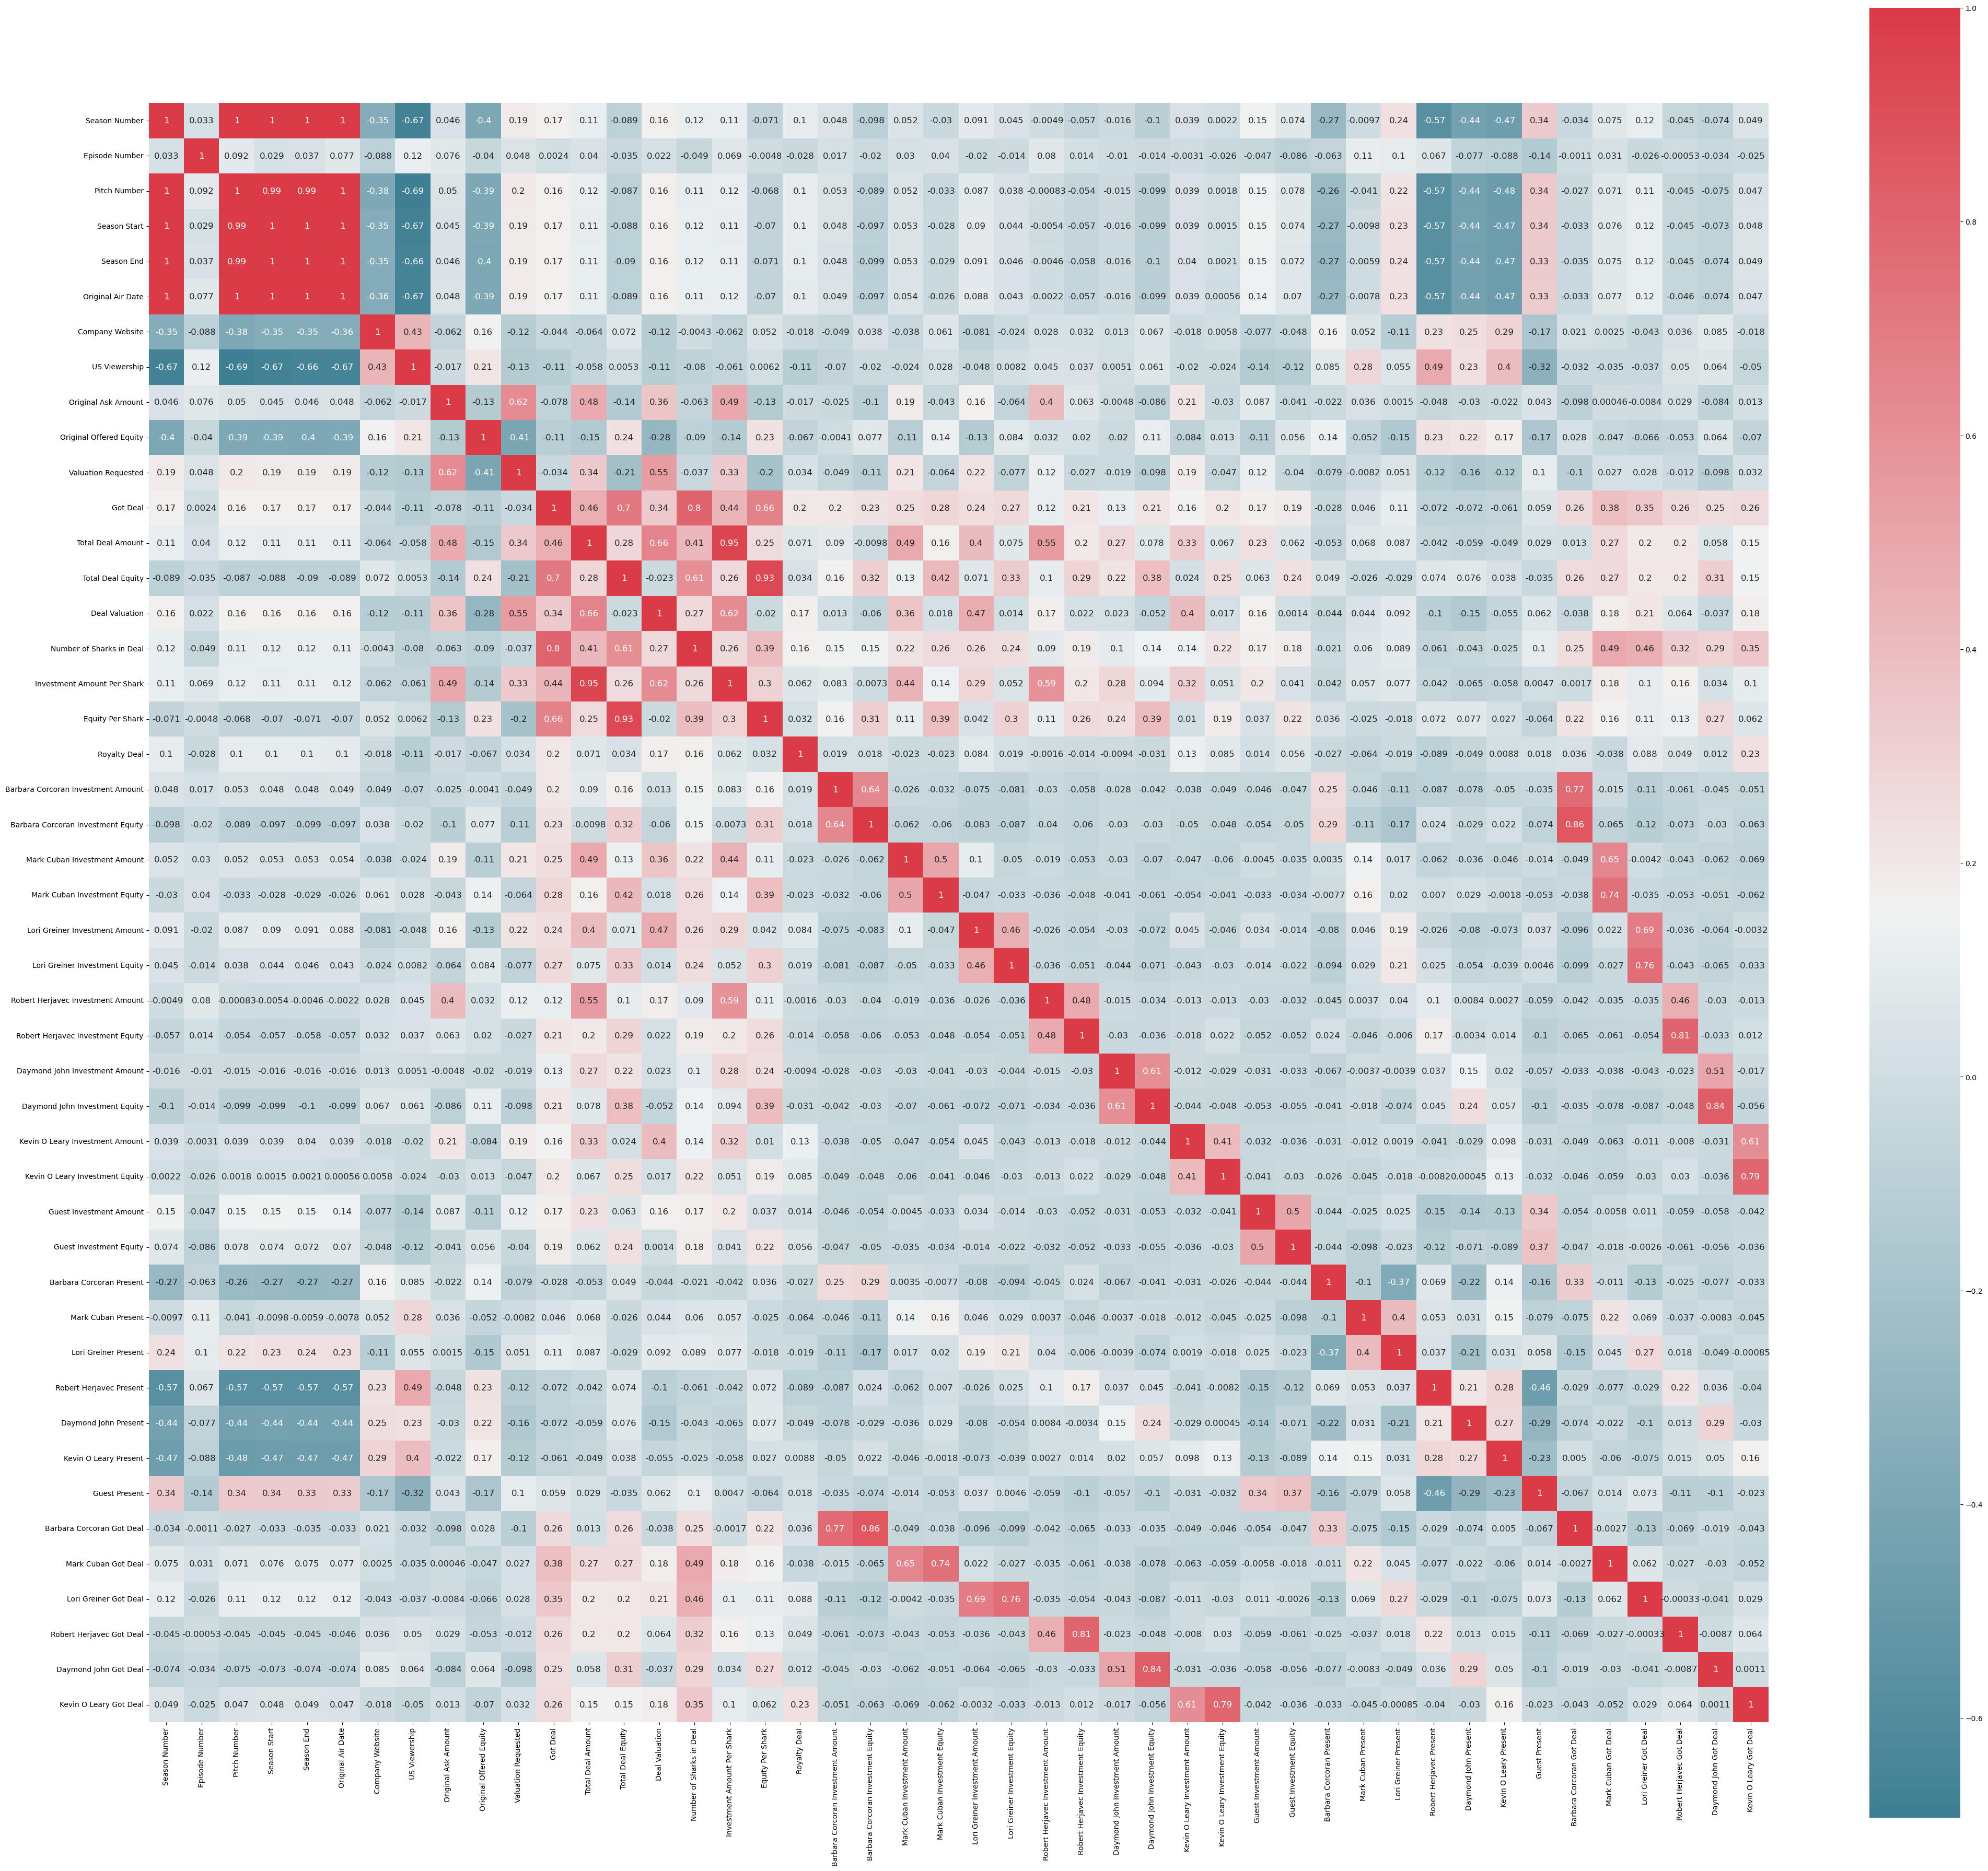

In [36]:
sharktank_corr_df = sharktank_df.drop(columns=['Startup Name','Industry','Business Description','Pitchers Gender','Guest Name'])

def plot_correlation_map(df):
    corr=df.corr()
    _,ax=plt.subplots(figsize=(50,50))
    cmap=sns.diverging_palette(220,10,as_cmap = True )
    _=sns.heatmap(corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12})

plot_correlation_map(sharktank_corr_df)

## 3. Model Development <a name="MDev"></a>

In [37]:
sharktank_model1_df = sharktank_df.loc[:, ['Industry', 'Company Website', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal']]

sharktank_model2_df = sharktank_df.loc[:, ['Industry', 'Company Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal']]

sharktank_model3_df = sharktank_df.loc[:, ['Industry', 'Company Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal', 
                                           'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 
                                           'Kevin O Leary Present', 'Guest Present']]

sharktank_model4_df = sharktank_df.loc[:, ['Season Number', 'Episode Number', 'Pitch Number', 'Industry', 'Company Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 
                                           'Original Offered Equity', 'Got Deal', 'Barbara Corcoran Present', 'Mark Cuban Present','Lori Greiner Present', 'Robert Herjavec Present', 
                                           'Daymond John Present', 'Kevin O Leary Present', 'Guest Present']]

sharktank_model5_df = sharktank_df.loc[:, ['Season Number', 'Episode Number', 'Pitch Number', 'Startup Name','Industry','Business Description', 'Company Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 
                                           'Original Offered Equity', 'Got Deal', 'Barbara Corcoran Present', 'Mark Cuban Present','Lori Greiner Present', 'Robert Herjavec Present', 
                                           'Daymond John Present', 'Kevin O Leary Present', 'Guest Present']]


In [38]:
# Convert categorical data to numeric with `pd.get_dummies`
sharktank_df_dummies = pd.get_dummies(sharktank_model5_df, dtype='int')
sharktank_df_dummies.head(10)

Season Number  Episode Number  Pitch Number  Company Website  \
0              1               1             1                1   
1              1               1             2                1   
2              1               1             3                1   
3              1               1             4                1   
4              1               1             5                0   
5              1               2             6                1   
6              1               2             7                1   
7              1               2             8                0   
8              1               2             9                1   
9              1               2            10                0   

   US Viewership  Original Ask Amount  Original Offered Equity  Got Deal  \
0           4.15                50000                     15.0         1   
1           4.15               460000                     10.0         1   
2           4.15              1200000                     10.0         0   
3           4.15               250000                     25.0         0   
4           4.15              1000000                     15.0         0   
5           5.59               500000                     15.0         1   
6           5.59               250000                     10.0         1   
7           5.59               500000                     10.0         0   
8           5.59               200000                     20.0         0   
9           5.59               100000                     20.0         0   

   Barbara Corcoran Present  Mark Cuban Present  Lori Greiner Present  \
0                       1.0                 0.0                   0.0   
1                       1.0                 0.0                   0.0   
2                       1.0                 0.0                   0.0   
3                       1.0                 0.0                   0.0   
4                       1.0                 0.0                   0.0   
5                       1.0                 0.0                   0.0   
6                       1.0                 0.0                   0.0   
7                       1.0                 0.0                   0.0   
8                       1.0                 0.0                   0.0   
9                       1.0                 0.0                   0.0   

   Robert Herjavec Present  Daymond John Present  Kevin O Leary Present  \
0                      1.0                   1.0                    1.0   
1                      1.0                   1.0                    1.0   
2                      1.0                   1.0                    1.0   
3                      1.0                   1.0                    1.0   
4                      1.0                   1.0                    1.0   
5                      1.0                   1.0                    1.0   
6                      1.0                   1.0                    1.0   
7                      1.0                   1.0                    1.0   
8                      1.0                   1.0                    1.0   
9                      1.0                   1.0                    1.0   

   Guest Present  Startup Name_#besomebody  Startup Name_180Cup  \
0            0.0                         0                    0   
1            0.0                         0                    0   
2            0.0                         0                    0   
3            0.0                         0                    0   
4            0.0                         0                    0   
5            0.0                         0                    0   
6            0.0                         0                    0   
7            0.0                         0                    0   
8            0.0                         0                    0   
9            0.0                         0                    0   

   Startup Name_2400Expert  Startup Name_50StateCapitalsin50

In [39]:
print("The sharktank_df dataframe has {} rows and {} columns."\
      .format(sharktank_df_dummies.shape[0], sharktank_df_dummies.shape[1]))

The sharktank_df dataframe has 1345 rows and 2719 columns.


In [40]:
# Split our preprocessed data into our features and target arrays
y = sharktank_df_dummies['Got Deal']
X = sharktank_df_dummies.drop(columns = 'Got Deal')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# Check datatype of X_train
type(X_train)

pandas.core.frame.DataFrame

### Compile, Train and Evaluate the Model

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 5, activation='relu', input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 13595     
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,886
Trainable params: 13,886
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5486
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6389
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7321
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8065
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8472
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.8988
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9276
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9444
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9494
Epoch 11/

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 1.8776 - accuracy: 0.6053 - 247ms/epoch - 22ms/step
Loss: 1.8775906562805176, Accuracy: 0.6053412556648254


In [47]:
# # Export our model to HDF5 file
# nn.save('my_model.h5')
# nn.save('my_model.keras')

In [48]:
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh'])

#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value=30,
#         step=5), activation=activation, input_dim=number_input_features))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 5)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=30,
#             step=5),
#             activation=activation))

#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

#     return nn_model

In [49]:
# # Import the kerastuner library
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective = "val_accuracy",
#     max_epochs=20,
#     hyperband_iterations=2
# )

In [50]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

# # Get top 3 model hyperparameters and print the values
# top_3_hyper = tuner.get_best_hyperparameters(3)
# for param in top_3_hyper:
#     print(param.values)

In [51]:
# # Evaluate the top 3 models against the test dataset
# top_3_models = tuner.get_best_models(3)
# for model in top_3_models:
#     model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
#     print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")